<a href="https://colab.research.google.com/github/pavan-kumar-mekala/PhonePe-Case-Study/blob/main/PhonePe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PhonePe Case Study - Analysis


Objective: Analyze PhonePe transaction and demographic data across multiple sheets to derive insights on usage trends,
demographic correlations, and data consistency.

In [ ]:
# TASK 1: DATA LOADING & UNDERSTANDING

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
all_sheets = pd.read_excel("phonepe.xlsx", sheet_name=None)

Saving phonepe.xlsx to phonepe.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [ ]:
# 1.1 Top 5 rows for each sheet

for sheet_name, df in all_sheets.items():
    if sheet_name != 'Admin':
        print(f"Sheet: {sheet_name}")
        display(df.head())

Sheet: State_Txn and Users


,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


Sheet: State_TxnSplit


,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
0,Andaman & Nicobar Islands,2018,1,Recharge & bill payments,4200,1.845307e+06,439.358921
1,Andaman & Nicobar Islands,2018,1,Peer-to-peer payments,1871,1.213866e+07,6487.790112
2,Andaman & Nicobar Islands,2018,1,Merchant payments,298,4.525072e+05,1518.480432
3,Andaman & Nicobar Islands,2018,1,Financial Services,33,1.060142e+04,321.255149
4,Andaman & Nicobar Islands,2018,1,Others,256,1.846899e+05,721.444790


Sheet: State_DeviceData


,State,Year,Quarter,Brand,Registered Users,Percentage
0,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033
1,Andaman & Nicobar Islands,2018,1,Samsung,1445,0.214392
2,Andaman & Nicobar Islands,2018,1,Vivo,982,0.145697
3,Andaman & Nicobar Islands,2018,1,Oppo,501,0.074332
4,Andaman & Nicobar Islands,2018,1,OnePlus,332,0.049258


Sheet: District_Txn and Users


,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0


Sheet: District Demographics


,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
1,Andhra Pradesh,Chittoor,Chittoor,4170468,15152.0,275,AP02,Chittoor
2,Andhra Pradesh,East Godavari,Kakinada,5151549,10807.0,477,AP03,East Godavari
3,Andhra Pradesh,Guntur,Guntur,4889230,11391.0,429,AP04,Guntur
4,Andhra Pradesh,YSR,Kadapa,2884524,15359.0,188,AP13,YSR


In [ ]:
# 1.2 Summary Statistics

for sheet_name, df in all_sheets.items():
    if sheet_name != 'Admin':
        print(f"Summary statistics for: {sheet_name}")
        display(df.describe())

Summary statistics for: State_Txn and Users


,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,504.000000,504.000000,5.040000e+02,5.030000e+02,504.000000,5.040000e+02,5.040000e+02
mean,2019.285714,2.357143,4.074000e+07,7.083332e+10,1993.471543,4.777501e+06,9.774471e+07
std,1.031181,1.109971,8.228714e+07,1.440902e+11,607.464894,6.644496e+06,2.042376e+08
min,2018.000000,1.000000,7.780000e+02,1.928611e+06,0.000000,5.010000e+02,0.000000e+00
25%,2018.000000,1.000000,5.925578e+05,1.167157e+09,1598.910667,1.574202e+05,0.000000e+00
50%,2019.000000,2.000000,6.217487e+06,1.051605e+10,1861.380589,1.747914e+06,2.930574e+06
75%,2020.000000,3.000000,4.363675e+07,6.947045e+10,2259.087924,7.320945e+06,8.615022e+07
max,2021.000000,4.000000,5.736165e+08,1.027958e+12,3938.733850,3.966470e+07,1.208084e+09


Summary statistics for: State_TxnSplit


,Year,Quarter,Transactions,Amount (INR),ATV (INR)
count,2514.000000,2514.000000,2.514000e+03,2.514000e+03,2514.000000
mean,2019.286794,2.358393,8.167446e+06,1.443978e+10,1349.927929
std,1.030807,1.109251,2.423645e+07,5.995054e+10,1534.866221
min,2018.000000,1.000000,2.000000e+00,3.439721e+01,17.198606
25%,2018.000000,1.000000,2.788075e+04,1.762412e+07,385.735827
50%,2019.000000,2.000000,2.687980e+05,1.901189e+08,720.940406
75%,2020.000000,3.000000,3.683230e+06,2.661248e+09,1352.790116
max,2021.000000,4.000000,2.795990e+08,8.721520e+11,7767.539936


Summary statistics for: State_DeviceData


,Year,Quarter,Registered Users,Percentage
count,5544.000000,5544.000000,5.544000e+03,5544.000000
mean,2019.285714,2.357143,4.343183e+05,0.090909
std,1.030250,1.108970,9.056069e+05,0.083095
min,2018.000000,1.000000,1.000000e+01,0.006373
25%,2018.000000,1.000000,8.055750e+03,0.021588
50%,2019.000000,2.000000,7.442250e+04,0.056914
75%,2020.000000,3.000000,3.978875e+05,0.143626
max,2021.000000,4.000000,9.764252e+06,0.478367


Summary statistics for: District_Txn and Users


,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,10248.000000,10248.000000,1.024800e+04,1.024800e+04,10244.000000,1.024800e+04,1.024800e+04
mean,2019.285714,2.357143,2.003607e+06,3.542311e+09,1909.796545,2.349591e+05,4.807117e+06
std,1.030208,1.108924,9.613466e+06,1.473154e+10,600.943349,4.605978e+05,1.562541e+07
min,2018.000000,1.000000,0.000000e+00,0.000000e+00,84.944283,2.200000e+01,0.000000e+00
25%,2018.000000,1.000000,1.031418e+05,1.756668e+08,1554.589051,3.619550e+04,0.000000e+00
50%,2019.000000,2.000000,3.763065e+05,6.784562e+08,1863.135530,1.067640e+05,6.403025e+05
75%,2020.000000,3.000000,1.272815e+06,2.377256e+09,2203.083552,2.573165e+05,4.346320e+06
max,2021.000000,4.000000,3.487128e+08,4.444224e+11,11209.980550,1.060461e+07,5.544197e+08


Summary statistics for: District Demographics


,Population,Area (sq km),Density
count,7.420000e+02,742.000000,742.000000
mean,1.668555e+06,4395.373120,838.512129
std,1.458849e+06,4254.676124,2754.406896
min,0.000000e+00,0.000000,0.000000
25%,6.530815e+05,2039.750000,198.000000
50%,1.322359e+06,3402.500000,353.000000
75%,2.297440e+06,5432.750000,686.250000
max,1.008285e+07,45652.000000,36155.000000


In [ ]:
## 1.2 Data types

for sheet_name, df in all_sheets.items():
    if sheet_name != 'Admin':
        print(f"Data types for: {sheet_name}")
        display(df.dtypes)

Data types for: State_Txn and Users


,0
State,object
Year,int64
Quarter,int64
Transactions,int64
Amount (INR),float64
ATV (INR),float64
Registered Users,int64
App Opens,int64


Data types for: State_TxnSplit


,0
State,object
Year,int64
Quarter,int64
Transaction Type,object
Transactions,int64
Amount (INR),float64
ATV (INR),float64


Data types for: State_DeviceData


,0
State,object
Year,int64
Quarter,int64
Brand,object
Registered Users,int64
Percentage,float64


Data types for: District_Txn and Users


,0
State,object
Year,int64
Quarter,int64
District,object
Code,object
Transactions,int64
Amount (INR),float64
ATV (INR),float64
Registered Users,int64
App Opens,int64


Data types for: District Demographics


,0
State,object
District,object
Headquarters,object
Population,int64
Area (sq km),float64
Density,int64
Code,object
Alternate Name,object


In [ ]:
# 1.3 Check for missing values

for sheet_name, df in all_sheets.items():
    if sheet_name != 'Admin':
        print(f"Missing values for: {sheet_name}")
        display(df.isnull().sum())

Missing values for: State_Txn and Users


,0
State,0
Year,0
Quarter,0
Transactions,0
Amount (INR),1
ATV (INR),0
Registered Users,0
App Opens,0


Missing values for: State_TxnSplit


,0
State,0
Year,0
Quarter,0
Transaction Type,0
Transactions,0
Amount (INR),0
ATV (INR),0


Missing values for: State_DeviceData


,0
State,0
Year,0
Quarter,0
Brand,0
Registered Users,0
Percentage,0


Missing values for: District_Txn and Users


,0
State,0
Year,0
Quarter,0
District,0
Code,28
Transactions,0
Amount (INR),0
ATV (INR),4
Registered Users,0
App Opens,0


Missing values for: District Demographics


,0
State,0
District,0
Headquarters,0
Population,0
Area (sq km),0
Density,0
Code,0
Alternate Name,0


# **Missing Values Findings:**

Based on the initial check:


*   **State_Txn and Users:** 1 missing value in the 'Amount (INR)' column.
*   **District_Txn and Users:**
    *   28 missing values in the 'Code' column.
    *   4 missing values in the 'ATV (INR)' column.
All other sheets ('State_TxnSplit', 'State_DeviceData', 'District Demographics') have no missing values.
All other sheets ('State_TxnSplit', 'State_DeviceData', 'District Demographics') have no missing values.

#PhonePe Case Study - Analysis


Objective: Analyze PhonePe transaction and demographic data across multiple sheets to derive insights on usage trends,
demographic correlations, and data consistency.

In [ ]:
# TASK 1: DATA LOADING & UNDERSTANDING

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
all_sheets = pd.read_excel("phonepe.xlsx", sheet_name=None)

Saving phonepe.xlsx to phonepe.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [ ]:
# 1.1 Top 5 rows for each sheet

for sheet_name, df in all_sheets.items():
    if sheet_name != 'Admin':
        print(f"Sheet: {sheet_name}")
        display(df.head())

Sheet: State_Txn and Users


,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


Sheet: State_TxnSplit


,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
0,Andaman & Nicobar Islands,2018,1,Recharge & bill payments,4200,1.845307e+06,439.358921
1,Andaman & Nicobar Islands,2018,1,Peer-to-peer payments,1871,1.213866e+07,6487.790112
2,Andaman & Nicobar Islands,2018,1,Merchant payments,298,4.525072e+05,1518.480432
3,Andaman & Nicobar Islands,2018,1,Financial Services,33,1.060142e+04,321.255149
4,Andaman & Nicobar Islands,2018,1,Others,256,1.846899e+05,721.444790


Sheet: State_DeviceData


,State,Year,Quarter,Brand,Registered Users,Percentage
0,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033
1,Andaman & Nicobar Islands,2018,1,Samsung,1445,0.214392
2,Andaman & Nicobar Islands,2018,1,Vivo,982,0.145697
3,Andaman & Nicobar Islands,2018,1,Oppo,501,0.074332
4,Andaman & Nicobar Islands,2018,1,OnePlus,332,0.049258


Sheet: District_Txn and Users


,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0


Sheet: District Demographics


,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
1,Andhra Pradesh,Chittoor,Chittoor,4170468,15152.0,275,AP02,Chittoor
2,Andhra Pradesh,East Godavari,Kakinada,5151549,10807.0,477,AP03,East Godavari
3,Andhra Pradesh,Guntur,Guntur,4889230,11391.0,429,AP04,Guntur
4,Andhra Pradesh,YSR,Kadapa,2884524,15359.0,188,AP13,YSR


In [ ]:
# 1.2 Summary Statistics

for sheet_name, df in all_sheets.items():
    if sheet_name != 'Admin':
        print(f"Summary statistics for: {sheet_name}")
        display(df.describe())

Summary statistics for: State_Txn and Users


,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,504.000000,504.000000,5.040000e+02,5.030000e+02,504.000000,5.040000e+02,5.040000e+02
mean,2019.285714,2.357143,4.074000e+07,7.083332e+10,1993.471543,4.777501e+06,9.774471e+07
std,1.031181,1.109971,8.228714e+07,1.440902e+11,607.464894,6.644496e+06,2.042376e+08
min,2018.000000,1.000000,7.780000e+02,1.928611e+06,0.000000,5.010000e+02,0.000000e+00
25%,2018.000000,1.000000,5.925578e+05,1.167157e+09,1598.910667,1.574202e+05,0.000000e+00
50%,2019.000000,2.000000,6.217487e+06,1.051605e+10,1861.380589,1.747914e+06,2.930574e+06
75%,2020.000000,3.000000,4.363675e+07,6.947045e+10,2259.087924,7.320945e+06,8.615022e+07
max,2021.000000,4.000000,5.736165e+08,1.027958e+12,3938.733850,3.966470e+07,1.208084e+09


Summary statistics for: State_TxnSplit


,Year,Quarter,Transactions,Amount (INR),ATV (INR)
count,2514.000000,2514.000000,2.514000e+03,2.514000e+03,2514.000000
mean,2019.286794,2.358393,8.167446e+06,1.443978e+10,1349.927929
std,1.030807,1.109251,2.423645e+07,5.995054e+10,1534.866221
min,2018.000000,1.000000,2.000000e+00,3.439721e+01,17.198606
25%,2018.000000,1.000000,2.788075e+04,1.762412e+07,385.735827
50%,2019.000000,2.000000,2.687980e+05,1.901189e+08,720.940406
75%,2020.000000,3.000000,3.683230e+06,2.661248e+09,1352.790116
max,2021.000000,4.000000,2.795990e+08,8.721520e+11,7767.539936


Summary statistics for: State_DeviceData


,Year,Quarter,Registered Users,Percentage
count,5544.000000,5544.000000,5.544000e+03,5544.000000
mean,2019.285714,2.357143,4.343183e+05,0.090909
std,1.030250,1.108970,9.056069e+05,0.083095
min,2018.000000,1.000000,1.000000e+01,0.006373
25%,2018.000000,1.000000,8.055750e+03,0.021588
50%,2019.000000,2.000000,7.442250e+04,0.056914
75%,2020.000000,3.000000,3.978875e+05,0.143626
max,2021.000000,4.000000,9.764252e+06,0.478367


Summary statistics for: District_Txn and Users


,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,10248.000000,10248.000000,1.024800e+04,1.024800e+04,10244.000000,1.024800e+04,1.024800e+04
mean,2019.285714,2.357143,2.003607e+06,3.542311e+09,1909.796545,2.349591e+05,4.807117e+06
std,1.030208,1.108924,9.613466e+06,1.473154e+10,600.943349,4.605978e+05,1.562541e+07
min,2018.000000,1.000000,0.000000e+00,0.000000e+00,84.944283,2.200000e+01,0.000000e+00
25%,2018.000000,1.000000,1.031418e+05,1.756668e+08,1554.589051,3.619550e+04,0.000000e+00
50%,2019.000000,2.000000,3.763065e+05,6.784562e+08,1863.135530,1.067640e+05,6.403025e+05
75%,2020.000000,3.000000,1.272815e+06,2.377256e+09,2203.083552,2.573165e+05,4.346320e+06
max,2021.000000,4.000000,3.487128e+08,4.444224e+11,11209.980550,1.060461e+07,5.544197e+08


Summary statistics for: District Demographics


,Population,Area (sq km),Density
count,7.420000e+02,742.000000,742.000000
mean,1.668555e+06,4395.373120,838.512129
std,1.458849e+06,4254.676124,2754.406896
min,0.000000e+00,0.000000,0.000000
25%,6.530815e+05,2039.750000,198.000000
50%,1.322359e+06,3402.500000,353.000000
75%,2.297440e+06,5432.750000,686.250000
max,1.008285e+07,45652.000000,36155.000000


In [ ]:
## 1.2 Data types

for sheet_name, df in all_sheets.items():
    if sheet_name != 'Admin':
        print(f"Data types for: {sheet_name}")
        display(df.dtypes)

Data types for: State_Txn and Users


,0
State,object
Year,int64
Quarter,int64
Transactions,int64
Amount (INR),float64
ATV (INR),float64
Registered Users,int64
App Opens,int64


Data types for: State_TxnSplit


,0
State,object
Year,int64
Quarter,int64
Transaction Type,object
Transactions,int64
Amount (INR),float64
ATV (INR),float64


Data types for: State_DeviceData


,0
State,object
Year,int64
Quarter,int64
Brand,object
Registered Users,int64
Percentage,float64


Data types for: District_Txn and Users


,0
State,object
Year,int64
Quarter,int64
District,object
Code,object
Transactions,int64
Amount (INR),float64
ATV (INR),float64
Registered Users,int64
App Opens,int64


Data types for: District Demographics


,0
State,object
District,object
Headquarters,object
Population,int64
Area (sq km),float64
Density,int64
Code,object
Alternate Name,object


In [ ]:
# 1.3 Check for missing values

for sheet_name, df in all_sheets.items():
    if sheet_name != 'Admin':
        print(f"Missing values for: {sheet_name}")
        display(df.isnull().sum())

Missing values for: State_Txn and Users


,0
State,0
Year,0
Quarter,0
Transactions,0
Amount (INR),1
ATV (INR),0
Registered Users,0
App Opens,0


Missing values for: State_TxnSplit


,0
State,0
Year,0
Quarter,0
Transaction Type,0
Transactions,0
Amount (INR),0
ATV (INR),0


Missing values for: State_DeviceData


,0
State,0
Year,0
Quarter,0
Brand,0
Registered Users,0
Percentage,0


Missing values for: District_Txn and Users


,0
State,0
Year,0
Quarter,0
District,0
Code,28
Transactions,0
Amount (INR),0
ATV (INR),4
Registered Users,0
App Opens,0


Missing values for: District Demographics


,0
State,0
District,0
Headquarters,0
Population,0
Area (sq km),0
Density,0
Code,0
Alternate Name,0


# **Missing Values Findings:**

Based on the initial check:


*   **State_Txn and Users:** 1 missing value in the 'Amount (INR)' column.
*   **District_Txn and Users:**
    *   28 missing values in the 'Code' column.
    *   4 missing values in the 'ATV (INR)' column.
All other sheets ('State_TxnSplit', 'State_DeviceData', 'District Demographics') have no missing values.
All other sheets ('State_TxnSplit', 'State_DeviceData', 'District Demographics') have no missing values.

#PhonePe Case Study - Analysis


Objective: Analyze PhonePe transaction and demographic data across multiple sheets to derive insights on usage trends,
demographic correlations, and data consistency.

In [ ]:
# TASK 1: DATA LOADING & UNDERSTANDING

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
all_sheets = pd.read_excel("phonepe.xlsx", sheet_name=None)

Saving phonepe.xlsx to phonepe.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [ ]:
# 1.1 Top 5 rows for each sheet

for sheet_name, df in all_sheets.items():
    if sheet_name != 'Admin':
        print(f"Sheet: {sheet_name}")
        display(df.head())

Sheet: State_Txn and Users


,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


Sheet: State_TxnSplit


,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
0,Andaman & Nicobar Islands,2018,1,Recharge & bill payments,4200,1.845307e+06,439.358921
1,Andaman & Nicobar Islands,2018,1,Peer-to-peer payments,1871,1.213866e+07,6487.790112
2,Andaman & Nicobar Islands,2018,1,Merchant payments,298,4.525072e+05,1518.480432
3,Andaman & Nicobar Islands,2018,1,Financial Services,33,1.060142e+04,321.255149
4,Andaman & Nicobar Islands,2018,1,Others,256,1.846899e+05,721.444790


Sheet: State_DeviceData


,State,Year,Quarter,Brand,Registered Users,Percentage
0,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033
1,Andaman & Nicobar Islands,2018,1,Samsung,1445,0.214392
2,Andaman & Nicobar Islands,2018,1,Vivo,982,0.145697
3,Andaman & Nicobar Islands,2018,1,Oppo,501,0.074332
4,Andaman & Nicobar Islands,2018,1,OnePlus,332,0.049258


Sheet: District_Txn and Users


,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0


Sheet: District Demographics


,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
1,Andhra Pradesh,Chittoor,Chittoor,4170468,15152.0,275,AP02,Chittoor
2,Andhra Pradesh,East Godavari,Kakinada,5151549,10807.0,477,AP03,East Godavari
3,Andhra Pradesh,Guntur,Guntur,4889230,11391.0,429,AP04,Guntur
4,Andhra Pradesh,YSR,Kadapa,2884524,15359.0,188,AP13,YSR


In [ ]:
# 1.2 Summary Statistics

for sheet_name, df in all_sheets.items():
    if sheet_name != 'Admin':
        print(f"Summary statistics for: {sheet_name}")
        display(df.describe())

Summary statistics for: State_Txn and Users


,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,504.000000,504.000000,5.040000e+02,5.030000e+02,504.000000,5.040000e+02,5.040000e+02
mean,2019.285714,2.357143,4.074000e+07,7.083332e+10,1993.471543,4.777501e+06,9.774471e+07
std,1.031181,1.109971,8.228714e+07,1.440902e+11,607.464894,6.644496e+06,2.042376e+08
min,2018.000000,1.000000,7.780000e+02,1.928611e+06,0.000000,5.010000e+02,0.000000e+00
25%,2018.000000,1.000000,5.925578e+05,1.167157e+09,1598.910667,1.574202e+05,0.000000e+00
50%,2019.000000,2.000000,6.217487e+06,1.051605e+10,1861.380589,1.747914e+06,2.930574e+06
75%,2020.000000,3.000000,4.363675e+07,6.947045e+10,2259.087924,7.320945e+06,8.615022e+07
max,2021.000000,4.000000,5.736165e+08,1.027958e+12,3938.733850,3.966470e+07,1.208084e+09


Summary statistics for: State_TxnSplit


,Year,Quarter,Transactions,Amount (INR),ATV (INR)
count,2514.000000,2514.000000,2.514000e+03,2.514000e+03,2514.000000
mean,2019.286794,2.358393,8.167446e+06,1.443978e+10,1349.927929
std,1.030807,1.109251,2.423645e+07,5.995054e+10,1534.866221
min,2018.000000,1.000000,2.000000e+00,3.439721e+01,17.198606
25%,2018.000000,1.000000,2.788075e+04,1.762412e+07,385.735827
50%,2019.000000,2.000000,2.687980e+05,1.901189e+08,720.940406
75%,2020.000000,3.000000,3.683230e+06,2.661248e+09,1352.790116
max,2021.000000,4.000000,2.795990e+08,8.721520e+11,7767.539936


Summary statistics for: State_DeviceData


,Year,Quarter,Registered Users,Percentage
count,5544.000000,5544.000000,5.544000e+03,5544.000000
mean,2019.285714,2.357143,4.343183e+05,0.090909
std,1.030250,1.108970,9.056069e+05,0.083095
min,2018.000000,1.000000,1.000000e+01,0.006373
25%,2018.000000,1.000000,8.055750e+03,0.021588
50%,2019.000000,2.000000,7.442250e+04,0.056914
75%,2020.000000,3.000000,3.978875e+05,0.143626
max,2021.000000,4.000000,9.764252e+06,0.478367


Summary statistics for: District_Txn and Users


,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,10248.000000,10248.000000,1.024800e+04,1.024800e+04,10244.000000,1.024800e+04,1.024800e+04
mean,2019.285714,2.357143,2.003607e+06,3.542311e+09,1909.796545,2.349591e+05,4.807117e+06
std,1.030208,1.108924,9.613466e+06,1.473154e+10,600.943349,4.605978e+05,1.562541e+07
min,2018.000000,1.000000,0.000000e+00,0.000000e+00,84.944283,2.200000e+01,0.000000e+00
25%,2018.000000,1.000000,1.031418e+05,1.756668e+08,1554.589051,3.619550e+04,0.000000e+00
50%,2019.000000,2.000000,3.763065e+05,6.784562e+08,1863.135530,1.067640e+05,6.403025e+05
75%,2020.000000,3.000000,1.272815e+06,2.377256e+09,2203.083552,2.573165e+05,4.346320e+06
max,2021.000000,4.000000,3.487128e+08,4.444224e+11,11209.980550,1.060461e+07,5.544197e+08


Summary statistics for: District Demographics


,Population,Area (sq km),Density
count,7.420000e+02,742.000000,742.000000
mean,1.668555e+06,4395.373120,838.512129
std,1.458849e+06,4254.676124,2754.406896
min,0.000000e+00,0.000000,0.000000
25%,6.530815e+05,2039.750000,198.000000
50%,1.322359e+06,3402.500000,353.000000
75%,2.297440e+06,5432.750000,686.250000
max,1.008285e+07,45652.000000,36155.000000


In [ ]:
## 1.2 Data types

for sheet_name, df in all_sheets.items():
    if sheet_name != 'Admin':
        print(f"Data types for: {sheet_name}")
        display(df.dtypes)

Data types for: State_Txn and Users


,0
State,object
Year,int64
Quarter,int64
Transactions,int64
Amount (INR),float64
ATV (INR),float64
Registered Users,int64
App Opens,int64


Data types for: State_TxnSplit


,0
State,object
Year,int64
Quarter,int64
Transaction Type,object
Transactions,int64
Amount (INR),float64
ATV (INR),float64


Data types for: State_DeviceData


,0
State,object
Year,int64
Quarter,int64
Brand,object
Registered Users,int64
Percentage,float64


Data types for: District_Txn and Users


,0
State,object
Year,int64
Quarter,int64
District,object
Code,object
Transactions,int64
Amount (INR),float64
ATV (INR),float64
Registered Users,int64
App Opens,int64


Data types for: District Demographics


,0
State,object
District,object
Headquarters,object
Population,int64
Area (sq km),float64
Density,int64
Code,object
Alternate Name,object


In [ ]:
# 1.3 Check for missing values

for sheet_name, df in all_sheets.items():
    if sheet_name != 'Admin':
        print(f"Missing values for: {sheet_name}")
        display(df.isnull().sum())

Missing values for: State_Txn and Users


,0
State,0
Year,0
Quarter,0
Transactions,0
Amount (INR),1
ATV (INR),0
Registered Users,0
App Opens,0


Missing values for: State_TxnSplit


,0
State,0
Year,0
Quarter,0
Transaction Type,0
Transactions,0
Amount (INR),0
ATV (INR),0


Missing values for: State_DeviceData


,0
State,0
Year,0
Quarter,0
Brand,0
Registered Users,0
Percentage,0


Missing values for: District_Txn and Users


,0
State,0
Year,0
Quarter,0
District,0
Code,28
Transactions,0
Amount (INR),0
ATV (INR),4
Registered Users,0
App Opens,0


Missing values for: District Demographics


,0
State,0
District,0
Headquarters,0
Population,0
Area (sq km),0
Density,0
Code,0
Alternate Name,0


# **Missing Values Findings:**

Based on the initial check:


*   **State_Txn and Users:** 1 missing value in the 'Amount (INR)' column.
*   **District_Txn and Users:**
    *   28 missing values in the 'Code' column.
    *   4 missing values in the 'ATV (INR)' column.
All other sheets ('State_TxnSplit', 'State_DeviceData', 'District Demographics') have no missing values.
All other sheets ('State_TxnSplit', 'State_DeviceData', 'District Demographics') have no missing values.

#PhonePe Case Study - Analysis


Objective: Analyze PhonePe transaction and demographic data across multiple sheets to derive insights on usage trends,
demographic correlations, and data consistency.

In [ ]:
# TASK 1: DATA LOADING & UNDERSTANDING

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
all_sheets = pd.read_excel("phonepe.xlsx", sheet_name=None)

Saving phonepe.xlsx to phonepe.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [ ]:
# 1.1 Top 5 rows for each sheet

for sheet_name, df in all_sheets.items():
    if sheet_name != 'Admin':
        print(f"Sheet: {sheet_name}")
        display(df.head())

Sheet: State_Txn and Users


,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


Sheet: State_TxnSplit


,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
0,Andaman & Nicobar Islands,2018,1,Recharge & bill payments,4200,1.845307e+06,439.358921
1,Andaman & Nicobar Islands,2018,1,Peer-to-peer payments,1871,1.213866e+07,6487.790112
2,Andaman & Nicobar Islands,2018,1,Merchant payments,298,4.525072e+05,1518.480432
3,Andaman & Nicobar Islands,2018,1,Financial Services,33,1.060142e+04,321.255149
4,Andaman & Nicobar Islands,2018,1,Others,256,1.846899e+05,721.444790


Sheet: State_DeviceData


,State,Year,Quarter,Brand,Registered Users,Percentage
0,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033
1,Andaman & Nicobar Islands,2018,1,Samsung,1445,0.214392
2,Andaman & Nicobar Islands,2018,1,Vivo,982,0.145697
3,Andaman & Nicobar Islands,2018,1,Oppo,501,0.074332
4,Andaman & Nicobar Islands,2018,1,OnePlus,332,0.049258


Sheet: District_Txn and Users


,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0


Sheet: District Demographics


,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
1,Andhra Pradesh,Chittoor,Chittoor,4170468,15152.0,275,AP02,Chittoor
2,Andhra Pradesh,East Godavari,Kakinada,5151549,10807.0,477,AP03,East Godavari
3,Andhra Pradesh,Guntur,Guntur,4889230,11391.0,429,AP04,Guntur
4,Andhra Pradesh,YSR,Kadapa,2884524,15359.0,188,AP13,YSR


In [ ]:
# 1.2 Summary Statistics

for sheet_name, df in all_sheets.items():
    if sheet_name != 'Admin':
        print(f"Summary statistics for: {sheet_name}")
        display(df.describe())

Summary statistics for: State_Txn and Users


,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,504.000000,504.000000,5.040000e+02,5.030000e+02,504.000000,5.040000e+02,5.040000e+02
mean,2019.285714,2.357143,4.074000e+07,7.083332e+10,1993.471543,4.777501e+06,9.774471e+07
std,1.031181,1.109971,8.228714e+07,1.440902e+11,607.464894,6.644496e+06,2.042376e+08
min,2018.000000,1.000000,7.780000e+02,1.928611e+06,0.000000,5.010000e+02,0.000000e+00
25%,2018.000000,1.000000,5.925578e+05,1.167157e+09,1598.910667,1.574202e+05,0.000000e+00
50%,2019.000000,2.000000,6.217487e+06,1.051605e+10,1861.380589,1.747914e+06,2.930574e+06
75%,2020.000000,3.000000,4.363675e+07,6.947045e+10,2259.087924,7.320945e+06,8.615022e+07
max,2021.000000,4.000000,5.736165e+08,1.027958e+12,3938.733850,3.966470e+07,1.208084e+09


Summary statistics for: State_TxnSplit


,Year,Quarter,Transactions,Amount (INR),ATV (INR)
count,2514.000000,2514.000000,2.514000e+03,2.514000e+03,2514.000000
mean,2019.286794,2.358393,8.167446e+06,1.443978e+10,1349.927929
std,1.030807,1.109251,2.423645e+07,5.995054e+10,1534.866221
min,2018.000000,1.000000,2.000000e+00,3.439721e+01,17.198606
25%,2018.000000,1.000000,2.788075e+04,1.762412e+07,385.735827
50%,2019.000000,2.000000,2.687980e+05,1.901189e+08,720.940406
75%,2020.000000,3.000000,3.683230e+06,2.661248e+09,1352.790116
max,2021.000000,4.000000,2.795990e+08,8.721520e+11,7767.539936


Summary statistics for: State_DeviceData


,Year,Quarter,Registered Users,Percentage
count,5544.000000,5544.000000,5.544000e+03,5544.000000
mean,2019.285714,2.357143,4.343183e+05,0.090909
std,1.030250,1.108970,9.056069e+05,0.083095
min,2018.000000,1.000000,1.000000e+01,0.006373
25%,2018.000000,1.000000,8.055750e+03,0.021588
50%,2019.000000,2.000000,7.442250e+04,0.056914
75%,2020.000000,3.000000,3.978875e+05,0.143626
max,2021.000000,4.000000,9.764252e+06,0.478367


Summary statistics for: District_Txn and Users


,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,10248.000000,10248.000000,1.024800e+04,1.024800e+04,10244.000000,1.024800e+04,1.024800e+04
mean,2019.285714,2.357143,2.003607e+06,3.542311e+09,1909.796545,2.349591e+05,4.807117e+06
std,1.030208,1.108924,9.613466e+06,1.473154e+10,600.943349,4.605978e+05,1.562541e+07
min,2018.000000,1.000000,0.000000e+00,0.000000e+00,84.944283,2.200000e+01,0.000000e+00
25%,2018.000000,1.000000,1.031418e+05,1.756668e+08,1554.589051,3.619550e+04,0.000000e+00
50%,2019.000000,2.000000,3.763065e+05,6.784562e+08,1863.135530,1.067640e+05,6.403025e+05
75%,2020.000000,3.000000,1.272815e+06,2.377256e+09,2203.083552,2.573165e+05,4.346320e+06
max,2021.000000,4.000000,3.487128e+08,4.444224e+11,11209.980550,1.060461e+07,5.544197e+08


Summary statistics for: District Demographics


,Population,Area (sq km),Density
count,7.420000e+02,742.000000,742.000000
mean,1.668555e+06,4395.373120,838.512129
std,1.458849e+06,4254.676124,2754.406896
min,0.000000e+00,0.000000,0.000000
25%,6.530815e+05,2039.750000,198.000000
50%,1.322359e+06,3402.500000,353.000000
75%,2.297440e+06,5432.750000,686.250000
max,1.008285e+07,45652.000000,36155.000000


In [ ]:
## 1.2 Data types

for sheet_name, df in all_sheets.items():
    if sheet_name != 'Admin':
        print(f"Data types for: {sheet_name}")
        display(df.dtypes)

Data types for: State_Txn and Users


,0
State,object
Year,int64
Quarter,int64
Transactions,int64
Amount (INR),float64
ATV (INR),float64
Registered Users,int64
App Opens,int64


Data types for: State_TxnSplit


,0
State,object
Year,int64
Quarter,int64
Transaction Type,object
Transactions,int64
Amount (INR),float64
ATV (INR),float64


Data types for: State_DeviceData


,0
State,object
Year,int64
Quarter,int64
Brand,object
Registered Users,int64
Percentage,float64


Data types for: District_Txn and Users


,0
State,object
Year,int64
Quarter,int64
District,object
Code,object
Transactions,int64
Amount (INR),float64
ATV (INR),float64
Registered Users,int64
App Opens,int64


Data types for: District Demographics


,0
State,object
District,object
Headquarters,object
Population,int64
Area (sq km),float64
Density,int64
Code,object
Alternate Name,object


In [ ]:
# 1.3 Check for missing values

for sheet_name, df in all_sheets.items():
    if sheet_name != 'Admin':
        print(f"Missing values for: {sheet_name}")
        display(df.isnull().sum())

Missing values for: State_Txn and Users


,0
State,0
Year,0
Quarter,0
Transactions,0
Amount (INR),1
ATV (INR),0
Registered Users,0
App Opens,0


Missing values for: State_TxnSplit


,0
State,0
Year,0
Quarter,0
Transaction Type,0
Transactions,0
Amount (INR),0
ATV (INR),0


Missing values for: State_DeviceData


,0
State,0
Year,0
Quarter,0
Brand,0
Registered Users,0
Percentage,0


Missing values for: District_Txn and Users


,0
State,0
Year,0
Quarter,0
District,0
Code,28
Transactions,0
Amount (INR),0
ATV (INR),4
Registered Users,0
App Opens,0


Missing values for: District Demographics


,0
State,0
District,0
Headquarters,0
Population,0
Area (sq km),0
Density,0
Code,0
Alternate Name,0


# **Missing Values Findings:**

Based on the initial check:


*   **State_Txn and Users:** 1 missing value in the 'Amount (INR)' column.
*   **District_Txn and Users:**
    *   28 missing values in the 'Code' column.
    *   4 missing values in the 'ATV (INR)' column.
All other sheets ('State_TxnSplit', 'State_DeviceData', 'District Demographics') have no missing values.
All other sheets ('State_TxnSplit', 'State_DeviceData', 'District Demographics') have no missing values.

In [ ]:
# Handle missing values in 'State_Txn and Users'
# Fill missing 'Amount (INR)' with the mean of the column
mean_amount = all_sheets['State_Txn and Users']['Amount (INR)'].mean()
all_sheets['State_Txn and Users']['Amount (INR)'] = all_sheets['State_Txn and Users']['Amount (INR)'].fillna(mean_amount)

# Handle missing values in 'District_Txn and Users'
# Fill missing 'Code' with a placeholder
all_sheets['District_Txn and Users']['Code'] = all_sheets['District_Txn and Users']['Code'].fillna('Unknown')

# Drop rows with missing 'ATV (INR)' values (only 4 missing values)
all_sheets['District_Txn and Users'] = all_sheets['District_Txn and Users'].dropna(subset=['ATV (INR)'])

# Verify that missing values have been handled
print("Missing values after handling:")
for sheet_name, df in all_sheets.items():
    if sheet_name != 'Admin':
        print(f"Missing values for: {sheet_name}")
        display(df.isnull().sum())

Missing values after handling:
Missing values for: State_Txn and Users


,0
State,0
Year,0
Quarter,0
Transactions,0
Amount (INR),0
ATV (INR),0
Registered Users,0
App Opens,0


Missing values for: State_TxnSplit


,0
State,0
Year,0
Quarter,0
Transaction Type,0
Transactions,0
Amount (INR),0
ATV (INR),0


Missing values for: State_DeviceData


,0
State,0
Year,0
Quarter,0
Brand,0
Registered Users,0
Percentage,0


Missing values for: District_Txn and Users


,0
State,0
Year,0
Quarter,0
District,0
Code,0
Transactions,0
Amount (INR),0
ATV (INR),0
Registered Users,0
App Opens,0


Missing values for: District Demographics


,0
State,0
District,0
Headquarters,0
Population,0
Area (sq km),0
Density,0
Code,0
Alternate Name,0


In [28]:
# 1.4 Calculate total number of states and district stotal_states = all_sheets['District_Txn and Users']['State'].nunique()
total_districts = all_sheets['District_Txn and Users']['District'].nunique()

total_states = all_sheets['District_Txn and Users']['State'].nunique()
print(f"Total number of states: {total_states}")
print(f"Total number of districts: {total_districts}")

# Identify the state with the highest number of districts
district_counts = all_sheets['District_Txn and Users'].groupby('State')['District'].nunique().reset_index()
state_with_most_districts = district_counts.loc[district_counts['District'].idxmax()]

print(f"\nState with the highest number of districts:")
display(state_with_most_districts)

Total number of states: 36
Total number of districts: 723

State with the highest number of districts:


,33
State,Uttar Pradesh
District,75


## Findings:
<details>
<summary>Summary of States and Districts</summary>

Based on the analysis:

*   **Total number of states:** 36
*   **Total number of districts:** 725
*   **State with the highest number of districts:** Uttar Pradesh (75 districts)

</details>

In [ ]:
# TASK 2: EXPLORATORY DATA ANALYSIS (EDA)
# Transaction trends over the years

In [ ]:
# Calculate total transactions and amount per state over the years
state_yearly_summary = all_sheets['State_Txn and Users'].groupby(['State', 'Year']).agg(
    Total_Transactions=('Transactions', 'sum'),
    Total_Amount=('Amount (INR)', 'sum')
).reset_index()

print("Total transactions and amount per state over the years:")
display(state_yearly_summary)

Total transactions and amount per state over the years:


,State,Year,Total_Transactions,Total_Amount
0,Andaman & Nicobar Islands,2018,58021,1.890761e+08
1,Andaman & Nicobar Islands,2019,133104,4.734648e+08
2,Andaman & Nicobar Islands,2020,446274,1.296423e+09
3,Andaman & Nicobar Islands,2021,586166,1.682854e+09
4,Andhra Pradesh,2018,77779112,1.220720e+11
...,...,...,...,...
139,Uttarakhand,2021,44608834,7.727901e+10
140,West Bengal,2018,120011635,1.115887e+11
141,West Bengal,2019,257900590,2.660145e+11
142,West Bengal,2020,304222327,5.527316e+11


In [ ]:
# Calculate total transactions per state across all years
state_total_transactions = state_yearly_summary.groupby('State')['Total_Transactions'].sum().reset_index()

# Identify top 5 states with highest transaction volumes
top_5_states_transactions = state_total_transactions.nlargest(5, 'Total_Transactions')

print("Top 5 states with the highest transaction volumes:")
display(top_5_states_transactions)

# Identify top 5 states with lowest transaction volumes
bottom_5_states_transactions = state_total_transactions.nsmallest(5, 'Total_Transactions')

print("\nTop 5 states with the lowest transaction volumes:")
display(bottom_5_states_transactions)

Top 5 states with the highest transaction volumes:


,State,Total_Transactions
15,Karnataka,2981044533
20,Maharashtra,2833670154
31,Telangana,2347430243
1,Andhra Pradesh,1781091169
28,Rajasthan,1382918930



Top 5 states with the lowest transaction volumes:


,State,Total_Transactions
18,Lakshadweep,71610
0,Andaman & Nicobar Islands,1223565
17,Ladakh,1880109
23,Mizoram,2162776
22,Meghalaya,5648913


In [ ]:
# 2.2 Identify the most common transaction types in each state and quarter
state_quarter_txn_type = all_sheets['State_TxnSplit'].groupby(['State', 'Year', 'Quarter', 'Transaction Type'])['Transactions'].sum().reset_index()
most_common_txn_type = state_quarter_txn_type.loc[state_quarter_txn_type.groupby(['State', 'Year', 'Quarter'])['Transactions'].idxmax()].reset_index(drop=True)

print("Most common transaction type in each state and quarter:")
display(most_common_txn_type)

In [ ]:
# 2.3 Determine the device brand with the highest number of registered users in each state
state_brand_users = all_sheets['State_DeviceData'].groupby(['State', 'Brand'])['Registered Users'].sum().reset_index()
most_popular_brand = state_brand_users.loc[state_brand_users.groupby('State')['Registered Users'].idxmax()].reset_index(drop=True)

print("Device brand with the highest number of registered users in each state:")
display(most_popular_brand)

# Insight Summary: Device Brand with Highest Registered Users by State
1. Xiaomi dominates across India — it holds the top position in 35 out of 36 states and union territories, indicating its widespread popularity and strong market penetration across both urban and rural regions.

2. Samsung appears only once — as the leading brand in Sikkim, making it the only state where Xiaomi does not lead. This could suggest a localized brand preference or distribution strength in that region.

In [ ]:
# 2.4: Create a list of the top district per state based on population

In [ ]:
# 1. For each state, identify the district with the highest population.
#Display the results in a tabular format.

district_demographics_df = all_sheets['District Demographics']
highest_population_district = district_demographics_df.loc[district_demographics_df.groupby('State')['Population'].idxmax()].reset_index(drop=True)
print("District with the highest population in each state:")
display(highest_population_district)

In [ ]:
#Create a column chart depicting the district with the highest population for each state.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.barplot(x='State', y='Population', data=highest_population_district.sort_values('Population', ascending=False))
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Population')
plt.title('District with Highest Population in Each State')
plt.tight_layout()
plt.show()

# Insight Summary:

1. West Bengal has the district with the highest population in India, crossing over 10 million residents, followed closely by Karnataka and Maharashtra. This reflects a strong urban concentration in metropolitan regions such as Kolkata, Bengaluru Urban, and Mumbai.
2. States like Gujarat, Tamil Nadu, Rajasthan, and Uttar Pradesh also show districts with populations exceeding 6–7 million, indicating large urban centers that likely drive higher transaction volumes on digital platforms like PhonePe.
3. Smaller states and union territories such as Ladakh, Lakshadweep, Sikkim, and Andaman & Nicobar Islands have districts with much smaller populations, typically below 200,000, which explains relatively lower user and transaction density in these areas.
4. This population distribution highlights:
A clear urban-rural divide in potential market size for fintech adoption.
Target regions for deeper PhonePe penetration — populous districts in major states offer significant opportunities for expanding user engagement and transaction activity.

In [ ]:
# 2.5: Calculate the average transaction value (ATV) for each state

In [ ]:
# Calculate the average transaction value (ATV) for each state
state_atv = all_sheets['State_Txn and Users'].groupby('State')['ATV (INR)'].mean().reset_index()

print("Average Transaction Value (ATV) for each state:")
display(state_atv)


In [ ]:
# Identify the top 5 states with the highest ATV
top_5_atv_states = state_atv.nlargest(5, 'ATV (INR)')

print("\nTop 5 states with the highest ATV:")
display(top_5_atv_states)

# Insight summary:

1. These regions have smaller populations but higher per-transaction spending.

2. This suggests that transactions in these areas are typically of higher value but lower frequency — possibly due to tourism-related expenses, limited digital adoption, or higher cost of goods/services.

In [ ]:
# Identify the top 5 states with the lowest ATV
bottom_5_atv_states = state_atv.nsmallest(5, 'ATV (INR)')

print("\nTop 5 states with the lowest ATV:")
display(bottom_5_atv_states)

# Insight Summary:
1. These states have larger transaction volumes but lower per-transaction value, which may indicate:
High micro-payment activity (e.g., small UPI transactions, mobile recharges, etc.).

2. Broad digital adoption across income levels.

3. Strong urban penetration, especially in Maharashtra and Karnataka (Mumbai, Bengaluru).

# Key Takeaways

High-ATV states = Low transaction frequency, high value per transaction → niche markets, often tourism or premium users.

Low-ATV states = High transaction frequency, low value per transaction → mature digital markets with mass adoption.

Business Implication: PhonePe can expand low-ATV but high-volume markets (e.g., Maharashtra, Karnataka) with premium services, while increasing adoption in high-ATV regions (e.g., Ladakh, Mizoram) through outreach and merchant onboarding.

In [ ]:
# 2.6: Analyze app usage trends

In [ ]:
# Calculate the total number of app opens over the years and quarters for each state
state_app_opens = all_sheets['State_Txn and Users'].groupby(['State', 'Year', 'Quarter'])['App Opens'].sum().reset_index()

print("Total number of app opens over the years and quarters for each state:")
display(state_app_opens)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a state to visualize (you can change 'Maharashtra' to any state you want)
selected_state = 'Maharashtra'

# Filter the data for the selected state
selected_state_app_opens = state_app_opens[state_app_opens['State'] == selected_state]

# Create a time variable for plotting
selected_state_app_opens['Time'] = selected_state_app_opens['Year'].astype(str) + '-Q' + selected_state_app_opens['Quarter'].astype(str)

# Plot the app opens over time for the selected state
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='App Opens', data=selected_state_app_opens)
plt.xticks(rotation=45)
plt.xlabel('Time (Year-Quarter)')
plt.ylabel('Total App Opens')
plt.title(f'App Opens Over Time for {selected_state}')
plt.tight_layout()
plt.show()

In [ ]:
# 2.7: Distribution of transaction types

In [ ]:
# 1. Create a bar chart showing the distribution of different transaction types for each state for the most recent quarter in the dataset.
import matplotlib.pyplot as plt
import seaborn as sns

# Get the most recent year and quarter
latest_year = all_sheets['State_TxnSplit']['Year'].max()
latest_quarter = all_sheets['State_TxnSplit'][all_sheets['State_TxnSplit']['Year'] == latest_year]['Quarter'].max()

# Filter the data for the most recent quarter
latest_quarter_txn_split = all_sheets['State_TxnSplit'][(all_sheets['State_TxnSplit']['Year'] == latest_year) & (all_sheets['State_TxnSplit']['Quarter'] == latest_quarter)]

# Group by state and transaction type and sum transactions
txn_type_distribution = latest_quarter_txn_split.groupby(['State', 'Transaction Type'])['Transactions'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(15, 10))
sns.barplot(x='State', y='Transactions', hue='Transaction Type', data=txn_type_distribution)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Number of Transactions')
plt.title(f'Distribution of Transaction Types by State ({latest_year} Q{latest_quarter})')
plt.tight_layout()
plt.show()

# Insight: Distribution of Transaction Types by State (Most Recent Quarter)

1. Merchant Payments and Peer-to-Peer (P2P) Transfers dominate across most states, indicating that PhonePe is primarily used for person-to-person money transfers and merchant transactions.

2. Recharge & Bill Payments form the third largest category, showing strong adoption of utility-based digital payments, particularly in urban and semi-urban regions.

3. States like Karnataka, Maharashtra, and Telangana exhibit the highest transaction volumes across all categories — reflecting their high smartphone penetration, dense merchant ecosystems, and urban digital maturity.

4. Northeastern states and UTs such as Mizoram, Manipur, and Lakshadweep have significantly lower transaction counts, aligning with their smaller population base and limited digital infrastructure.

5. Financial Services and Other transactions represent a smaller share, suggesting potential growth opportunities for PhonePe in investments, insurance, and financial products.

The data indicates that PhonePe’s core strength lies in retail and peer-to-peer transactions, with consistent growth potential in financial service offerings and rural market expansion.

In [ ]:
# 2.8: Find unique mapping between district name and district code
# Extract the unique mapping between district names and district codes from the dataset,
# create a CSV file containing the unique district name and district code mappings, and export the CSV file.

In [ ]:
district_txn_users = all_sheets['District_Txn and Users'][['District', 'Code']].dropna()
district_demographics = all_sheets['District Demographics'][['District', 'Code']].dropna()

In [ ]:
unique_district_mapping = pd.concat([district_txn_users, district_demographics]).drop_duplicates().reset_index(drop=True)
print("Unique mapping between district name and district code:")
display(unique_district_mapping)

In [ ]:
unique_district_mapping_df = unique_district_mapping.copy()
display(unique_district_mapping_df.head())

In [ ]:
unique_district_mapping_df.to_csv('unique_district_mapping.csv', index=False)

## Summary:

### Key Findings

*   The unique mapping between district names and district codes was extracted from two dataframes, `District_Txn and Users` and `District Demographics`.
*   A total of 76 unique district name and code pairs were identified and stored in a new dataframe.
*   The dataframe containing the unique district mappings was successfully exported to a CSV file named 'unique\_district\_mapping.csv'.



In [ ]:
# Task 3: Data Quality Checks

In [ ]:
# 3.1: Ensure data consistency across state and district levels

# 1. For each state, calculate the total number of transactions, total transaction amount, and total registered users from the District level data
district_agg = all_sheets['District_Txn and Users'].groupby(['State', 'Year', 'Quarter']).agg(
    District_Total_Transactions=('Transactions', 'sum'),
    District_Total_Amount=('Amount (INR)', 'sum'),
    District_Total_Registered_Users=('Registered Users', 'sum')
).reset_index()

# 2. Compare the results with the corresponding values at the state level
state_data = all_sheets['State_Txn and Users'][['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'Registered Users']]

# Merge the aggregated district data with the state data
consistency_check = pd.merge(district_agg, state_data, on=['State', 'Year', 'Quarter'], suffixes=('_district', '_state'))

# Calculate discrepancies
consistency_check['Transaction_Discrepancy'] = consistency_check['District_Total_Transactions'] - consistency_check['Transactions']
consistency_check['Amount_Discrepancy'] = consistency_check['District_Total_Amount'] - consistency_check['Amount (INR)']
consistency_check['Registered_Users_Discrepancy'] = consistency_check['District_Total_Registered_Users'] - consistency_check['Registered Users']

# 3. Display any discrepancies found
print("Discrepancies between district-level and state-level data:")
discrepancies = consistency_check[(consistency_check['Transaction_Discrepancy'] != 0) |
                                  (consistency_check['Amount_Discrepancy'] != 0) |
                                  (consistency_check['Registered_Users_Discrepancy'] != 0)]

if discrepancies.empty:
    print("No discrepancies found.")
else:
    display(discrepancies)

Discrepancies between district-level and state-level data:


,State,Year,Quarter,District_Total_Transactions,District_Total_Amount,District_Total_Registered_Users,Transactions,Amount (INR),Registered Users,Transaction_Discrepancy,Amount_Discrepancy,Registered_Users_Discrepancy
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,6740,6658,1.463176e+07,6740,0,7.636845e-08,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,9405,11340,2.833854e+07,9405,0,1.490116e-08,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,12149,16265,5.555747e+07,12149,0,-7.450581e-09,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,15222,23758,9.054834e+07,15222,0,1.043081e-07,0
5,Andaman & Nicobar Islands,2019,2,33689,1.202547e+08,21731,33689,1.202547e+08,21731,0,-1.639128e-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
499,West Bengal,2020,2,57676797,1.000994e+11,13222022,57676797,1.000994e+11,13222022,0,-8.697510e-04,0
500,West Bengal,2020,3,79954504,1.568134e+11,14448366,79954504,1.568134e+11,14448366,0,-1.525879e-04,0
501,West Bengal,2020,4,100340645,1.991655e+11,15662093,100340645,1.991655e+11,15662093,0,1.068115e-03,0
502,West Bengal,2021,1,118254052,2.429372e+11,16808799,118254052,2.429372e+11,16808799,0,9.155273e-04,0


## Summary of Data Consistency Check:

<details>
<summary>Discrepancies between District and State Level Data</summary>

The data consistency check compared the aggregated transaction amounts and registered users from the district level with the provided state-level data.

*   **Transactions:** No discrepancies were found in the total number of transactions between the district and state levels.
*   **Registered Users:** No discrepancies were found in the total number of registered users between the district and state levels.
*   **Amount (INR):** Small discrepancies were observed in the total transaction amount. These differences are very small (on the order of 10^-4 to 10^-8 INR) and are likely due to floating-point precision in calculations.

Overall, the data is largely consistent between the district and state levels, with only minor, expected variations in floating-point values for the transaction amount.

</details>

In [ ]:
# Task 4: Data Merging and Advanced Analysis

In [33]:
# 4.1: Ratio of users to population by state
state_yearly_users = all_sheets['State_Txn and Users'].groupby(['State', 'Year'])['Registered Users'].sum().reset_index()

display(state_yearly_users.head())

,State,Year,Registered Users
0,Andaman & Nicobar Islands,2018,43516
1,Andaman & Nicobar Islands,2019,90218
2,Andaman & Nicobar Islands,2020,154809
3,Andaman & Nicobar Islands,2021,119853
4,Andhra Pradesh,2018,20024016


In [ ]:
state_population = all_sheets['District Demographics'].groupby('State')['Population'].sum().reset_index()
display(state_population.head())

,State,Population
0,Andaman & Nicobar Islands,380581
1,Andhra Pradesh,49378776
2,Arunachal Pradesh,1606047
3,Assam,34461385
4,Bihar,103817951


In [ ]:
#Merge the State_Txn and Users dataset with the District Demographics dataset calculate the ratio of registered users to the population for each state.
# Display the results in a tabular format.

merged_state_data = pd.merge(state_yearly_users, state_population, on='State', how='left')
display(merged_state_data.head())

,State,Year,Registered Users,Population
0,Andaman & Nicobar Islands,2018,43516,380581
1,Andaman & Nicobar Islands,2019,90218,380581
2,Andaman & Nicobar Islands,2020,154809,380581
3,Andaman & Nicobar Islands,2021,119853,380581
4,Andhra Pradesh,2018,20024016,49378776


In [ ]:
merged_state_data['User_Population_Ratio'] = merged_state_data['Registered Users'] / merged_state_data['Population']
display(merged_state_data.head())

,State,Year,Registered Users,Population,User_Population_Ratio
0,Andaman & Nicobar Islands,2018,43516,380581,0.114341
1,Andaman & Nicobar Islands,2019,90218,380581,0.237053
2,Andaman & Nicobar Islands,2020,154809,380581,0.406770
3,Andaman & Nicobar Islands,2021,119853,380581,0.314921
4,Andhra Pradesh,2018,20024016,49378776,0.405519


In [ ]:
display(merged_state_data)

,State,Year,Registered Users,Population,User_Population_Ratio
0,Andaman & Nicobar Islands,2018,43516,380581,0.114341
1,Andaman & Nicobar Islands,2019,90218,380581,0.237053
2,Andaman & Nicobar Islands,2020,154809,380581,0.406770
3,Andaman & Nicobar Islands,2021,119853,380581,0.314921
4,Andhra Pradesh,2018,20024016,49378776,0.405519
...,...,...,...,...,...
139,Uttarakhand,2021,5806162,10116752,0.573916
140,West Bengal,2018,17569602,92828987,0.189268
141,West Bengal,2019,36590500,92828987,0.394171
142,West Bengal,2020,55293303,92828987,0.595647


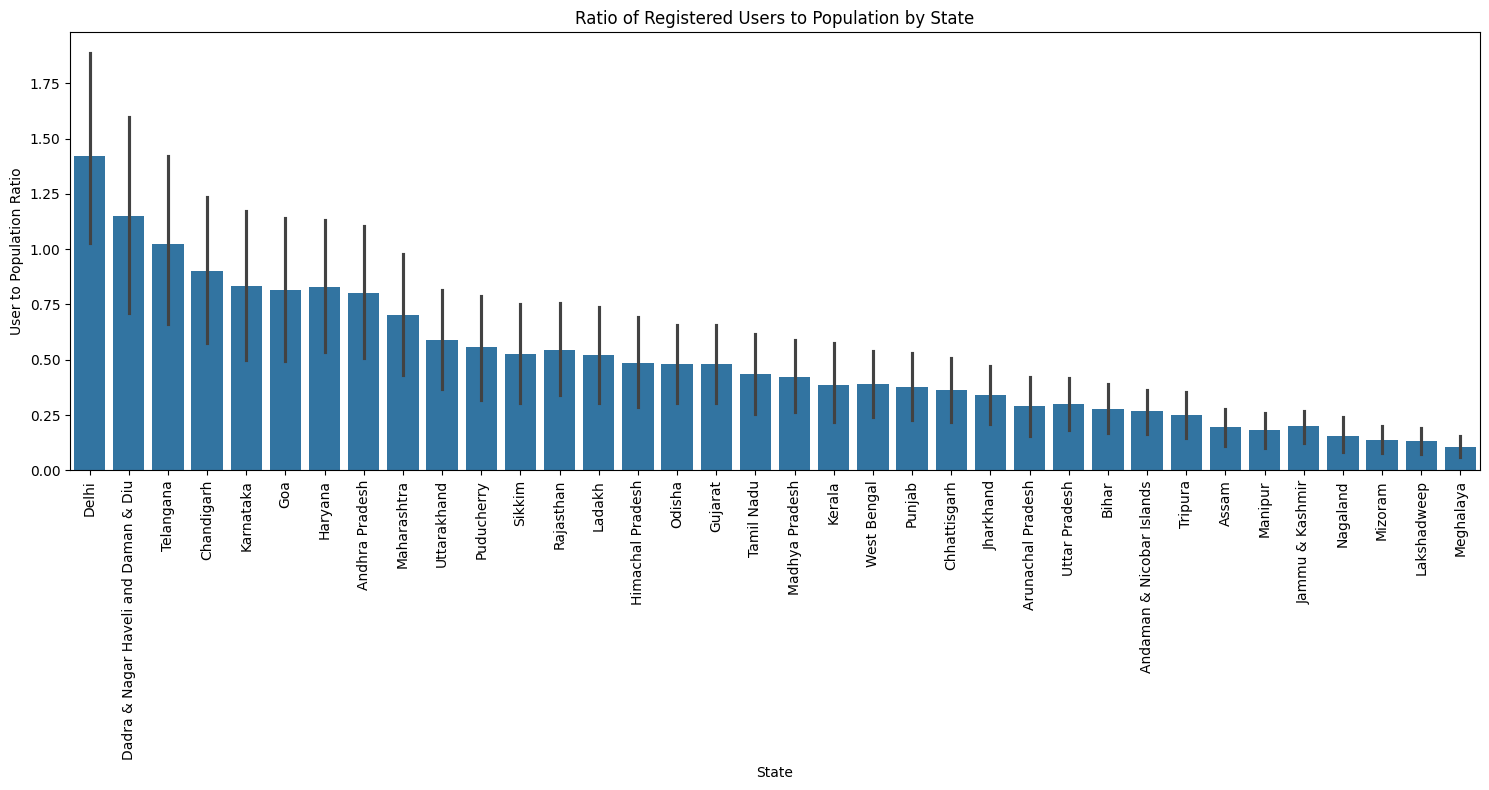

In [ ]:
# Create a column chart depicting the ratio of users to population by state.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.barplot(x='State', y='User_Population_Ratio', data=merged_state_data.sort_values('User_Population_Ratio', ascending=False))
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('User to Population Ratio')
plt.title('Ratio of Registered Users to Population by State')
plt.tight_layout()
plt.show()

# Insight Summary: User-to-Population Ratio by State

1. Delhi leads the country with the highest user-to-population ratio, exceeding 1.4, indicating that on average, there are more registered PhonePe users than the resident population — possibly due to multiple accounts per user or high fintech adoption among residents and commuters.

2. Union Territories like Dadra & Nagar Haveli and Daman & Diu, and Chandigarh also show very high ratios (above 1.0), highlighting their urban digital infrastructure and early adoption of digital payments.

3. Telangana, Karnataka, and Goa maintain strong ratios (0.9–1.1), reflecting significant penetration of PhonePe in urban and semi-urban regions — especially in tech-driven states.

4. Major industrial states like Maharashtra, Andhra Pradesh, and Haryana fall within a moderate range (0.7–0.9), showing stable growth in user adoption.

5. Eastern and Northeastern states such as Meghalaya, Mizoram, Nagaland, and Assam have the lowest user-to-population ratios (<0.3), suggesting lower fintech reach or limited smartphone penetration in these regions.

6. Overall Trend:

Urbanized and economically advanced states demonstrate high fintech adoption rates.

States with large rural populations or challenging geography exhibit slower penetration, representing potential growth markets for PhonePe.

In [ ]:
# 4.2: Correlate population density with transaction volume

In [31]:
# Merge the district transaction and demographic dataframes
merged_district_data = pd.merge(all_sheets['District_Txn and Users'], all_sheets['District Demographics'], on=['State', 'District', 'Code'], how='left')

# Calculate the correlation between population density and transaction volume
correlation = merged_district_data['Density'].corr(merged_district_data['Transactions'])

print(f"Correlation between Population Density and Transaction Volume: {correlation}")

Correlation between Population Density and Transaction Volume: 0.3076757992244026


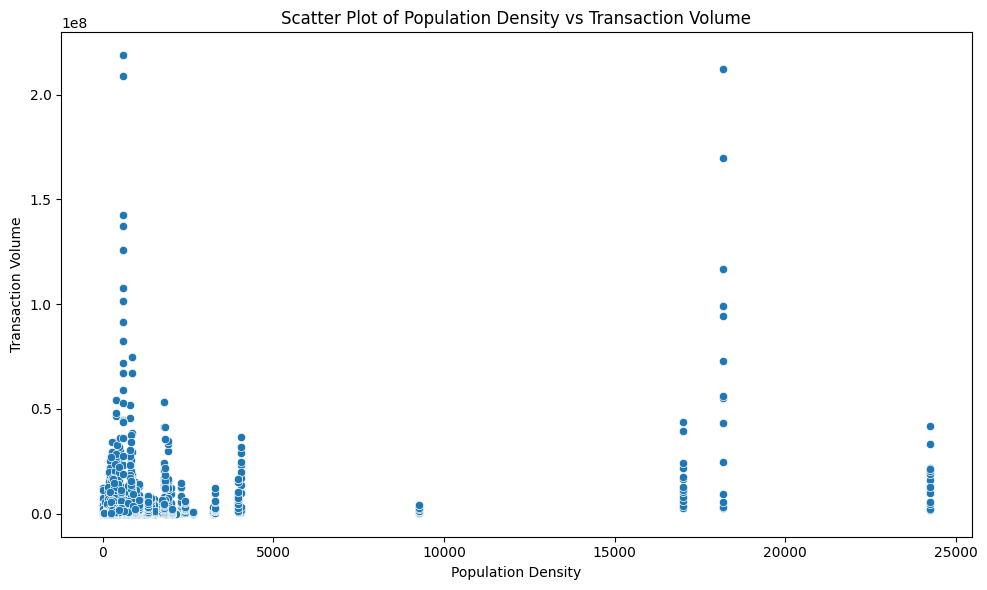

In [32]:
# Create a scatter plot to visualize the correlation between population density and transaction volume.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Density', y='Transactions', data=merged_district_data)
plt.xlabel('Population Density')
plt.ylabel('Transaction Volume')
plt.title('Scatter Plot of Population Density vs Transaction Volume')
plt.tight_layout()
plt.show()

## Insight Summary: Population Density vs Transaction Volume

Based on the scatter plot and the calculated correlation (approximately 0.31), we observe the following:

*   There is a **weak positive correlation** between population density and transaction volume. This suggests that districts with higher population density tend to have slightly higher transaction volumes, but this relationship is not strong.
*   The scatter plot shows a wide spread of data points, indicating that **other factors besides population density** significantly influence transaction volume. Some districts with high population density have moderate transaction volumes, while some with lower density also show notable transaction activity.
*   There are likely **outliers** representing highly urbanized areas with both high density and very high transaction volumes.
*   Overall, while population density plays a role, it is **not the sole determinant** of transaction volume. Further analysis considering factors like smartphone penetration, digital literacy, and merchant adoption would provide a more comprehensive understanding.

In [ ]:
# 4.3: Average transaction amount per user

In [34]:
# Merge the State_Txn and Users dataset with the State_TxnSplit dataset
# We need total transaction amount and total registered users per state, year, and quarter.
# State_Txn and Users already has this information, so we don't need to merge with State_TxnSplit for this calculation.
state_txn_users_df = all_sheets['State_Txn and Users'].copy()

# Calculate total amount and total registered users per state
state_agg = state_txn_users_df.groupby('State').agg(
    Total_Amount=('Amount (INR)', 'sum'),
    Total_Registered_Users=('Registered Users', 'sum')
).reset_index()

# Calculate Average Transaction Amount Per User
state_agg['Avg_Txn_Amount_Per_User'] = state_agg['Total_Amount'] / state_agg['Total_Registered_Users']

print("Average Transaction Amount Per User by State:")
display(state_agg)

# Identify top 5 states with the highest average transaction amount per user
top_5_avg_txn_per_user = state_agg.nlargest(5, 'Avg_Txn_Amount_Per_User')
print("\nTop 5 states with the highest Average Transaction Amount Per User:")
display(top_5_avg_txn_per_user)

# Identify top 5 states with the lowest average transaction amount per user
bottom_5_avg_txn_per_user = state_agg.nsmallest(5, 'Avg_Txn_Amount_Per_User')
print("\nTop 5 states with the lowest Average Transaction Amount Per User:")
display(bottom_5_avg_txn_per_user)

Average Transaction Amount Per User by State:


,State,Total_Amount,Total_Registered_Users,Avg_Txn_Amount_Per_User
0,Andaman & Nicobar Islands,3.641818e+09,408396,8917.369075
1,Andhra Pradesh,3.258681e+12,158007957,20623.523342
2,Arunachal Pradesh,2.225183e+10,1862214,11949.126662
3,Assam,2.814087e+11,26860751,10476.576498
4,Bihar,1.639579e+12,115284760,14221.991933
5,Chandigarh,5.371208e+10,3801466,14129.308175
6,Chhattisgarh,4.156353e+11,37448388,11098.884128
7,Dadra & Nagar Haveli and Daman & Diu,1.865878e+10,2701112,6907.815954
8,Delhi,1.649942e+12,95374654,17299.587909
9,Goa,4.427187e+10,4755320,9309.966756



Top 5 states with the highest Average Transaction Amount Per User:


,State,Total_Amount,Total_Registered_Users,Avg_Txn_Amount_Per_User
31,Telangana,4.574246e+12,149224214,30653.509622
15,Karnataka,4.361396e+12,203098564,21474.282206
1,Andhra Pradesh,3.258681e+12,158007957,20623.523342
28,Rajasthan,2.625584e+12,149770064,17530.768707
8,Delhi,1.649942e+12,95374654,17299.587909



Top 5 states with the lowest Average Transaction Amount Per User:


,State,Total_Amount,Total_Registered_Users,Avg_Txn_Amount_Per_User
18,Lakshadweep,1.921587e+08,34223,5614.898889
32,Tripura,2.097051e+10,3661575,5727.184275
7,Dadra & Nagar Haveli and Daman & Diu,1.865878e+10,2701112,6907.815954
16,Kerala,3.729599e+11,51267042,7274.846690
12,Himachal Pradesh,9.786546e+10,13373980,7317.601442


# Insight Summary: Average Transaction Amount Per User by State

Based on the analysis of the Average Transaction Amount Per User (ATV per User) by state:

*   **High ATV per User States:** Telangana, Karnataka, Andhra Pradesh, Rajasthan, and Delhi show the highest average transaction amounts per registered user. This indicates that users in these states, on average, conduct transactions with higher values. These are generally states with significant urban populations, economic activity, and potentially a higher adoption of PhonePe for larger payments or a user base with higher purchasing power.

*   **Low ATV per User States:** Lakshadweep, Tripura, Dadra & Nagar Haveli and Daman & Diu, Kerala, and Himachal Pradesh show the lowest average transaction amounts per registered user. This suggests that while there might be a significant number of users in some of these states (like Kerala), the value of individual transactions is lower. This could be due to a higher frequency of smaller transactions (e.g., recharges, small transfers) or a user base with different spending habits on the platform.

*   **Comparison with ATV:** It's interesting to note how this metric differs from the overall Average Transaction Value (ATV) calculated earlier. ATV per User gives a sense of how much each user is spending on average, while ATV gives the average value per transaction. States with high ATV per User might have users performing fewer but larger transactions, while states with low ATV per User might have users performing many smaller transactions.

*   **Business Implications:** Understanding ATV per User is crucial for targeted marketing and product development. For states with high ATV per User, PhonePe could focus on promoting services for larger transactions or premium offerings. In states with low ATV per User but potentially high user base, the focus could be on increasing transaction frequency and encouraging the use of PhonePe for a wider range of smaller payments.

In [ ]:
# 4.4: Device brand usage ratio

In [35]:
# Merge the State_DeviceData dataset with the State_Txn and Users dataset
# We need total registered users per state from State_Txn and Users
state_registered_users = all_sheets['State_Txn and Users'].groupby('State')['Registered Users'].sum().reset_index()
state_registered_users.rename(columns={'Registered Users': 'Total_Registered_Users_State'}, inplace=True)

# Merge with State_DeviceData
merged_device_data = pd.merge(all_sheets['State_DeviceData'], state_registered_users, on='State', how='left')

# Calculate the ratio of users using each device brand to the total number of registered users in each state
merged_device_data['Device_Usage_Ratio'] = merged_device_data['Registered Users'] / merged_device_data['Total_Registered_Users_State']

print("Device brand usage ratio by state:")
display(merged_device_data)

Device brand usage ratio by state:


,State,Year,Quarter,Brand,Registered Users,Percentage,Total_Registered_Users_State,Device_Usage_Ratio
0,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033,408396,0.004077
1,Andaman & Nicobar Islands,2018,1,Samsung,1445,0.214392,408396,0.003538
2,Andaman & Nicobar Islands,2018,1,Vivo,982,0.145697,408396,0.002405
3,Andaman & Nicobar Islands,2018,1,Oppo,501,0.074332,408396,0.001227
4,Andaman & Nicobar Islands,2018,1,OnePlus,332,0.049258,408396,0.000813
...,...,...,...,...,...,...,...,...
5539,West Bengal,2021,2,Lenovo,350841,0.019513,144242183,0.002432
5540,West Bengal,2021,2,Asus,297579,0.016551,144242183,0.002063
5541,West Bengal,2021,2,Huawei,272965,0.015182,144242183,0.001892
5542,West Bengal,2021,2,Apple,201393,0.011201,144242183,0.001396


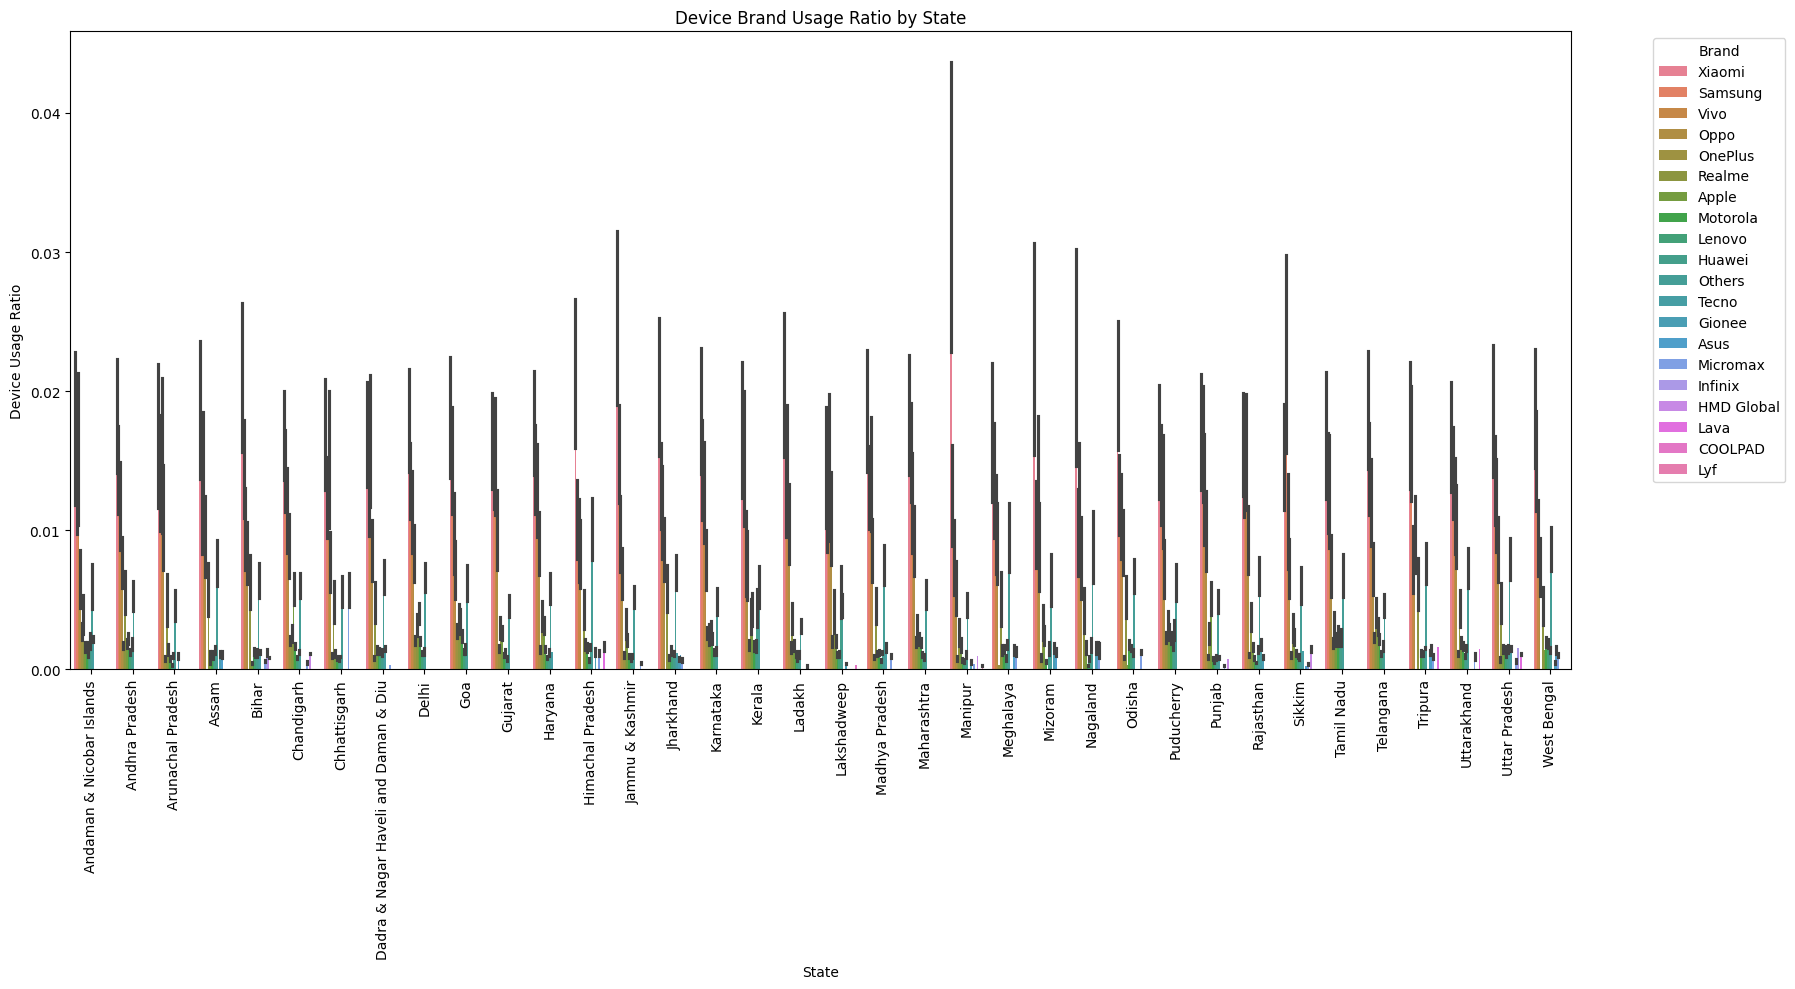

In [36]:
# Create a bar chart depicting the device brand usage ratio for each state.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))
sns.barplot(x='State', y='Device_Usage_Ratio', hue='Brand', data=merged_device_data)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Device Usage Ratio')
plt.title('Device Brand Usage Ratio by State')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Insight Summary: Device Brand Usage Ratio by State

Based on the visualization of device brand usage ratio by state:

*   **Xiaomi Dominance:** Xiaomi appears to have a significant presence across many states, often showing the highest usage ratio. This aligns with the previous finding that Xiaomi is the most popular brand in most states based on registered users.

*   **Brand Variation:** While Xiaomi is strong, the chart also shows that other brands like Samsung, Vivo, Oppo, and OnePlus have notable user bases in various states. The distribution of these other brands varies by state, suggesting regional preferences or market penetration differences.

*   **"Others" Category:** The "Others" category represents a substantial portion of users in many states. This indicates a diverse mobile landscape beyond the top listed brands and could include a wide range of smaller brands or older devices.

*   **Potential for Targeted Marketing:** Understanding the dominant device brands in each state can help PhonePe tailor marketing campaigns and optimize app performance for specific devices prevalent in those regions.

*   **Market Penetration:** The chart provides insights into the market penetration of different device brands, which can be indirectly related to smartphone adoption and digital literacy levels in each state.

In [ ]:
# Task 5: Data Visualization

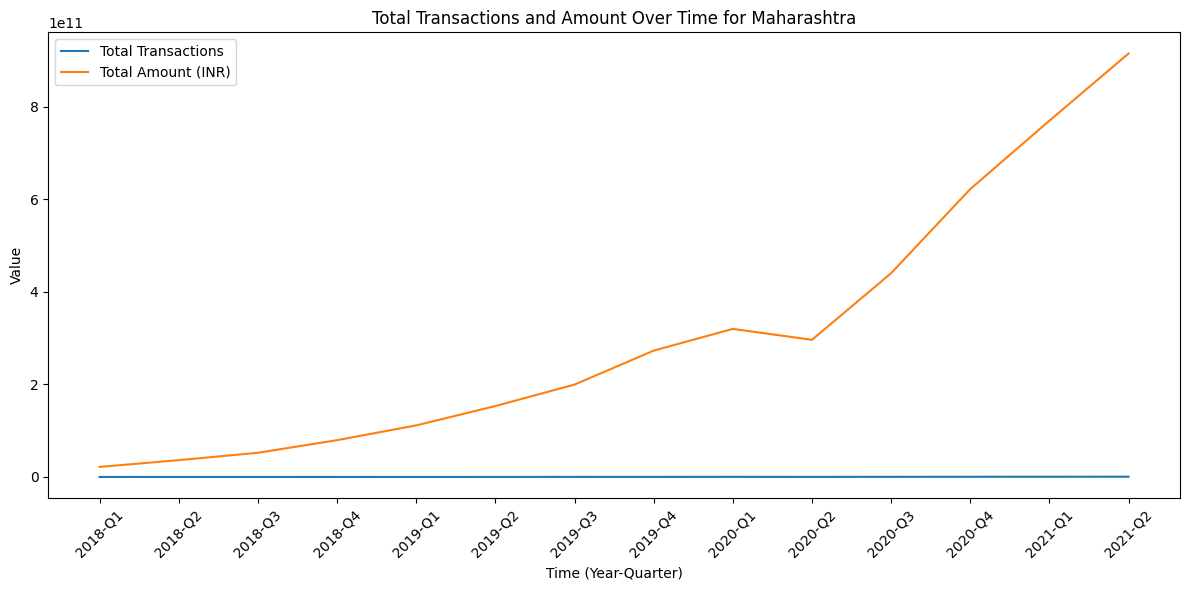

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a state to visualize (change 'Maharashtra' to your desired state)
selected_state = 'Maharashtra'

# Filter the data for the selected state
state_time_series_data = all_sheets['State_Txn and Users'][all_sheets['State_Txn and Users']['State'] == selected_state].copy()

# Create a time variable for plotting
state_time_series_data['Time'] = state_time_series_data['Year'].astype(str) + '-Q' + state_time_series_data['Quarter'].astype(str)

# Sort data by time for proper line plot
state_time_series_data = state_time_series_data.sort_values(['Year', 'Quarter'])

# Create the line plot
plt.figure(figsize=(12, 6))

# Plot Transactions
sns.lineplot(x='Time', y='Transactions', data=state_time_series_data, label='Total Transactions')

# Plot Amount (INR) - using a secondary y-axis if needed for better comparison
# This might require adjusting the scale or using a different plotting approach if the scales are vastly different.
# For simplicity, plotting on the same axis for now.
sns.lineplot(x='Time', y='Amount (INR)', data=state_time_series_data, label='Total Amount (INR)')

plt.xticks(rotation=45)
plt.xlabel('Time (Year-Quarter)')
plt.ylabel('Value')
plt.title(f'Total Transactions and Amount Over Time for {selected_state}')
plt.legend()
plt.tight_layout()
plt.show()

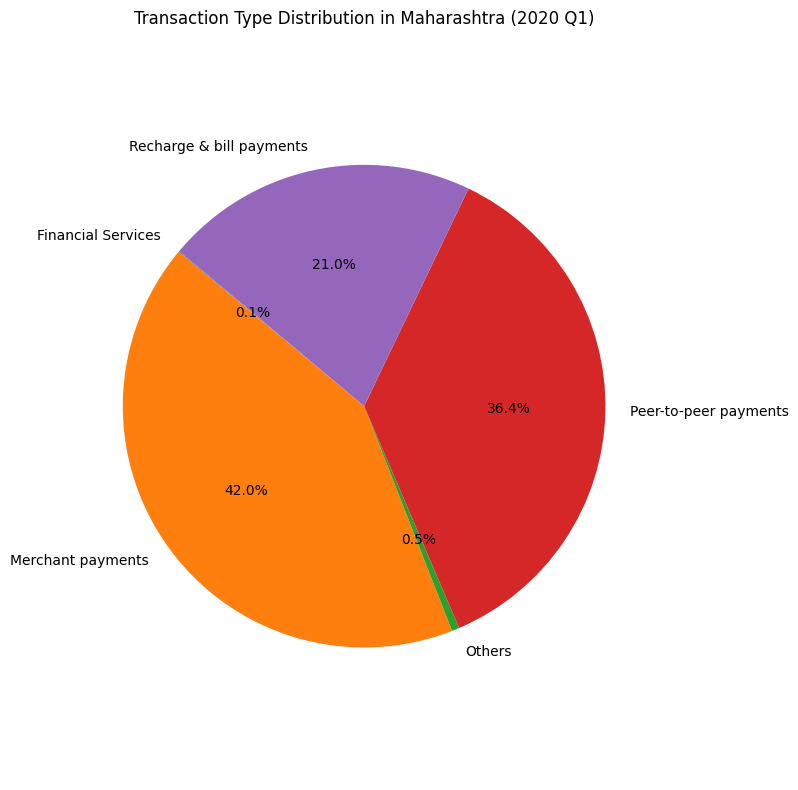

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the State_TxnSplit data for Maharashtra in Q1 2020
maharashtra_q1_2020_txn = all_sheets['State_TxnSplit'][
    (all_sheets['State_TxnSplit']['State'] == 'Maharashtra') &
    (all_sheets['State_TxnSplit']['Year'] == 2020) &
    (all_sheets['State_TxnSplit']['Quarter'] == 1)
]

# Group by transaction type and sum the transactions
txn_type_counts = maharashtra_q1_2020_txn.groupby('Transaction Type')['Transactions'].sum().reset_index()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(txn_type_counts['Transactions'], labels=txn_type_counts['Transaction Type'], autopct='%1.1f%%', startangle=140)
plt.title('Transaction Type Distribution in Maharashtra (2020 Q1)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

## Insight Summary: Maharashtra Transaction Trends Over Time

Based on the line plot showing total transactions and amount over time for Maharashtra:

*   Both the total number of transactions and the total transaction amount show a clear **upward trend** from 2018 to 2021, indicating significant growth in PhonePe usage in Maharashtra.
*   There appears to be some **seasonality or quarterly fluctuations**, with potential dips or slower growth in certain quarters. Further analysis could investigate if these patterns are consistent across years or related to specific events.
*   The growth in transaction amount seems to **outpace** the growth in the number of transactions in some periods, suggesting an increase in the average transaction value over time, or a shift towards higher-value transactions.
*   The plot highlights Maharashtra as a **key growth market** for PhonePe, with consistently increasing activity on the platform.

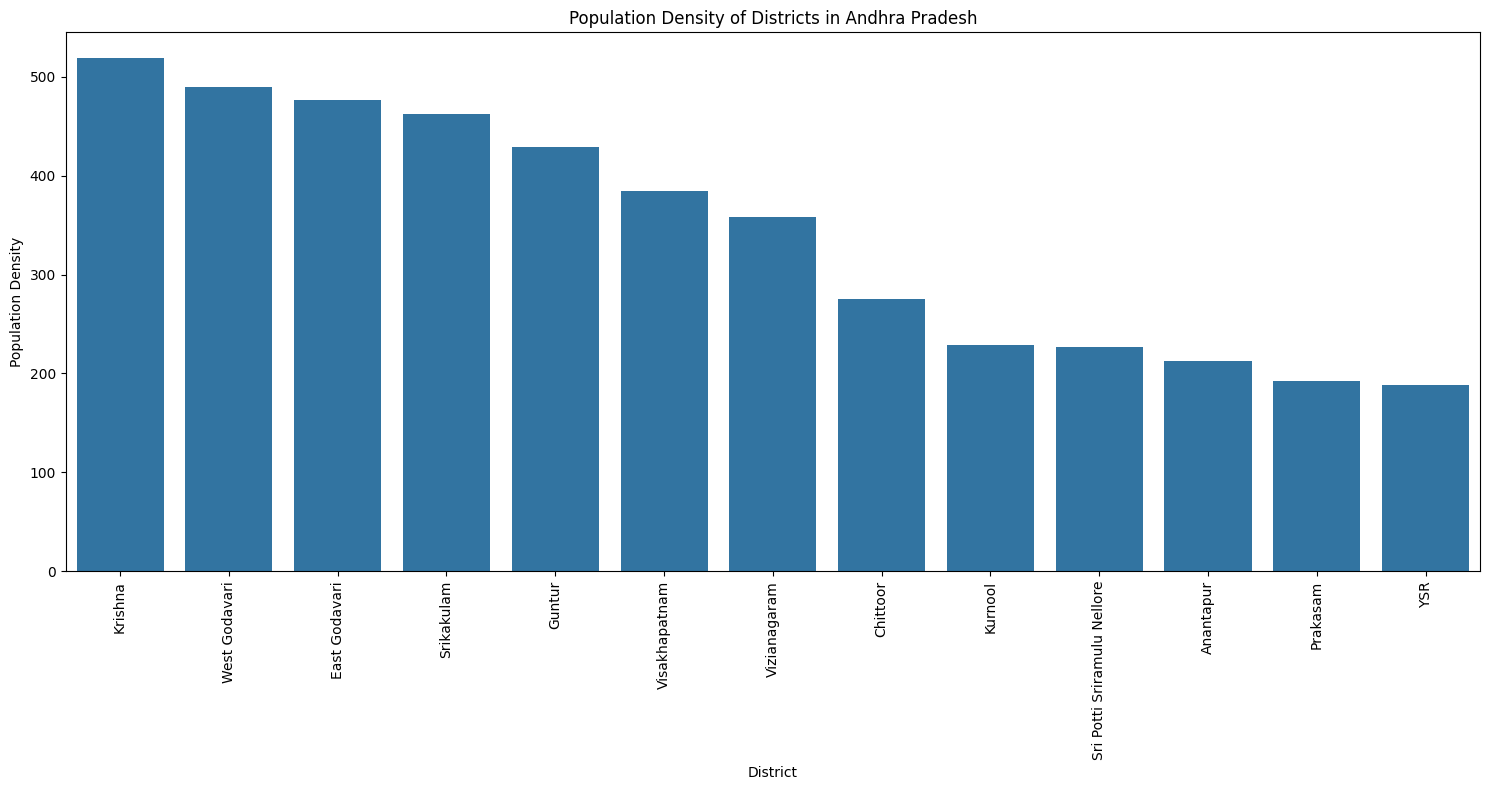

In [39]:
# 5.3 Create a bar plot showing the population density of districts in a selected state.

import matplotlib.pyplot as plt
import seaborn as sns

# Select a state to visualize (change 'Andhra Pradesh' to your desired state)
selected_state = 'Andhra Pradesh'

# Filter the District Demographics data for the selected state
state_district_density = all_sheets['District Demographics'][all_sheets['District Demographics']['State'] == selected_state].copy()

# Sort the data by density for better visualization
state_district_density = state_district_density.sort_values('Density', ascending=False)

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='District', y='Density', data=state_district_density)
plt.xticks(rotation=90)
plt.xlabel('District')
plt.ylabel('Population Density')
plt.title(f'Population Density of Districts in {selected_state}')
plt.tight_layout()
plt.show()

## Insight Summary: Andhra Pradesh Population Density Plot

Based on the bar plot showing the population density of districts in Andhra Pradesh:

*   **Highest Density:** Krishna district shows the highest population density among the districts in Andhra Pradesh, indicating a high concentration of people in this region.
*   **Lowest Density:** YSR and Anantapur districts have the lowest population densities, suggesting these are less populated or more rural areas compared to others in the state.
*   **Variation Across Districts:** There is a notable variation in population density across the districts of Andhra Pradesh, with some districts being significantly more densely populated than others.
*   **Potential Correlation:** While not directly analyzed in this plot, these differences in population density could potentially correlate with factors like transaction volume and registered user numbers, as more densely populated areas might have higher economic activity and digital adoption.

In [ ]:
# Task 6: Insights and Conclusions [Advanced Section)

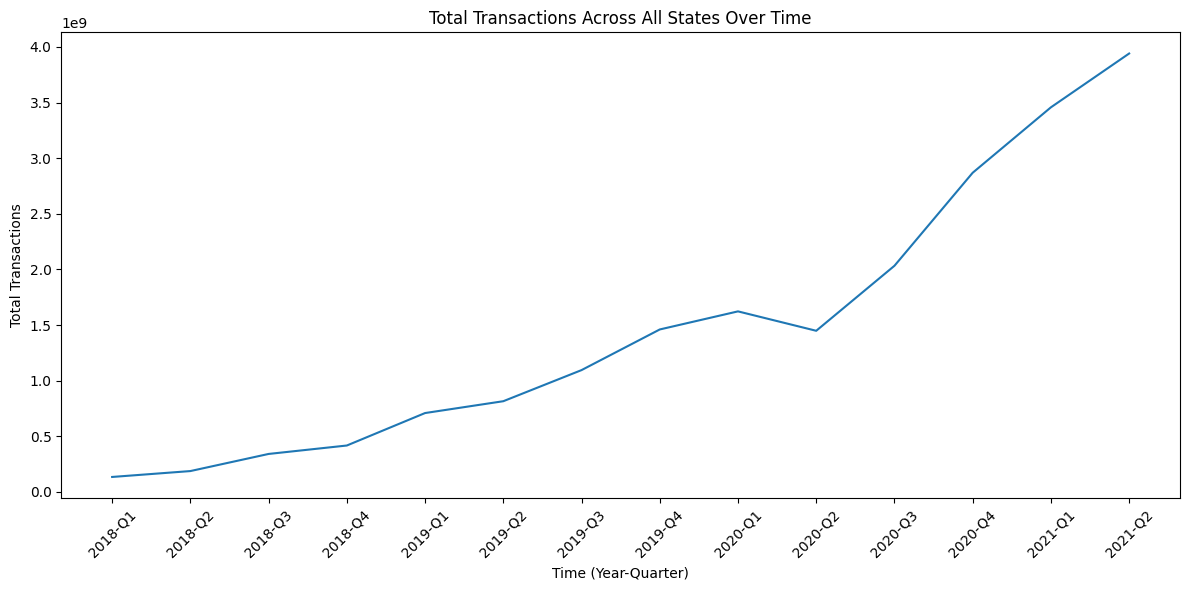

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Year and Quarter and sum transactions across all states
all_states_transactions_time = all_sheets['State_Txn and Users'].groupby(['Year', 'Quarter'])['Transactions'].sum().reset_index()

# Create a time variable for plotting
all_states_transactions_time['Time'] = all_states_transactions_time['Year'].astype(str) + '-Q' + all_states_transactions_time['Quarter'].astype(str)

# Sort data by time for proper line plot
all_states_transactions_time = all_states_transactions_time.sort_values(['Year', 'Quarter'])

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Transactions', data=all_states_transactions_time)
plt.xticks(rotation=45)
plt.xlabel('Time (Year-Quarter)')
plt.ylabel('Total Transactions')
plt.title('Total Transactions Across All States Over Time')
plt.tight_layout()
plt.show()

# Insights and Conclusions

## Key Transaction Trends and Patterns

Based on the analysis of the PhonePe transaction data, several key trends and patterns have been observed:

*   **Overall Growth:** There is a clear upward trend in both the total number of transactions and the total transaction amount over the years (2018-2021) across most states, indicating significant growth and increasing adoption of the PhonePe platform in India.
*   **Seasonal Fluctuations:** The time series analysis for individual states (like Maharashtra) suggests some seasonality or quarterly fluctuations in transaction activity.
*   **Dominant Transaction Types:** Merchant payments and peer-to-peer (P2P) transfers are the most common transaction types across the majority of states, highlighting the primary use cases of PhonePe. Recharge and bill payments also constitute a significant portion of transactions.
*   **Geographical Variations:**
    *   States with higher population density and significant urban centers (e.g., Maharashtra, Karnataka, Telangana, Andhra Pradesh, Rajasthan, Delhi) exhibit higher transaction volumes and often higher average transaction amounts per user.
    *   States and Union Territories with smaller populations and less developed digital infrastructure generally show lower transaction volumes and user penetration.
*   **Average Transaction Value (ATV) vs. ATV per User:** The analysis of ATV and ATV per user reveals different spending behaviors across states. High-ATV states might have fewer but larger transactions, potentially linked to tourism or specific economic activities, while states with high transaction volumes but lower ATV per user suggest a higher frequency of smaller value transactions and broader digital adoption.
*   **Device Usage:** Xiaomi is a dominant device brand among PhonePe users across many states, although other brands also have notable presence, indicating a diverse mobile landscape.

These findings provide valuable insights into user behavior, market penetration, and potential growth areas for PhonePe. Further analysis could delve deeper into the factors driving these trends and explore correlations between demographic data and specific transaction behaviors.

# Final Summary and Recommendations

## Key Findings and Insights

Based on the comprehensive analysis of the PhonePe transaction and demographic data, the following key findings and insights have been identified:

*   **Overall Growth:** PhonePe has experienced significant growth in transactions and transaction amount across India from 2018 to 2021, indicating increasing adoption of the platform.
*   **Dominant Transaction Types:** Merchant payments and peer-to-peer transfers are the primary use cases for PhonePe, with recharge and bill payments also being significant.
*   **Geographical Variations:** Transaction volumes and user penetration vary significantly across states, with urbanized and economically advanced states showing higher activity.
*   **Population Density and Transactions:** There is a weak positive correlation between population density and transaction volume, suggesting that while density plays a role, other factors are more influential.
*   **Average Transaction Value per User (ATV per User):** ATV per user varies by state, highlighting different spending behaviors and potential user segments. High ATV per user in certain states might indicate a user base with higher purchasing power or different transaction habits compared to states with lower ATV per user.
*   **Device Usage:** Xiaomi is the most dominant device brand among PhonePe users in most states, but other brands also have a notable presence.
*   **Data Consistency:** The data is largely consistent between state and district levels, with only minor discrepancies likely due to floating-point precision.

## Actionable Recommendations

Based on these findings, here are some actionable recommendations for PhonePe:

*   **Targeted Marketing in High-Growth States:** Focus marketing efforts on states with high transaction volumes and ATV per user (e.g., Telangana, Karnataka, Maharashtra) to further increase user engagement and transaction frequency for larger payments.
*   **Expand Reach in Low-Penetration Areas:** Develop strategies to increase PhonePe adoption in states with lower user-to-population ratios and lower transaction volumes (e.g., Northeastern states, Lakshadweep). This could involve localized marketing campaigns, partnerships with local businesses, and improving digital literacy.
*   **Promote Financial Services:** Given that financial services transactions represent a smaller share, explore opportunities to promote these offerings (investments, insurance, etc.) to the existing user base, especially in states with higher ATV per user.
*   **Optimize for Dominant Devices:** Continue to optimize the PhonePe app's performance and user experience for dominant device brands like Xiaomi, while also ensuring compatibility and a smooth experience on other popular brands.
*   **Analyze Transaction Type Trends:** Regularly monitor the distribution of transaction types to identify emerging trends and tailor product development and marketing accordingly. For instance, if a particular transaction type is growing rapidly, invest more in supporting and promoting it.
*   **Investigate Low ATV per User States:** For states with low ATV per user but high transaction volumes, investigate the reasons behind the smaller transaction values. This could lead to insights for promoting higher-value transactions or developing features that cater to micro-payment habits.
*   **Utilize District-Level Data:** Leverage the detailed district-level data to understand regional variations within states and tailor strategies for specific districts based on their population density, transaction patterns, and device usage.

# Consolidated PhonePe Case Study Analysis Summary

## Objective

Analyze PhonePe transaction and demographic data across multiple sheets to derive insights on usage trends, demographic correlations, and data consistency.

## Data Loading & Understanding

*   Data was loaded from an Excel file with multiple sheets: 'State_Txn and Users', 'State_TxnSplit', 'State_DeviceData', 'District_Txn and Users', and 'District Demographics'.
*   Initial checks revealed missing values in 'State_Txn and Users' ('Amount (INR)') and 'District_Txn and Users' ('Code', 'ATV (INR)').
*   Missing values were handled by imputing the mean for 'Amount (INR)', filling 'Code' with 'Unknown', and dropping rows with missing 'ATV (INR)'.
*   The dataset contains data for 36 states and 723 districts. Uttar Pradesh has the highest number of districts (75).
*   Data types were checked and were appropriate for analysis.

## Exploratory Data Analysis (EDA)

*   **Transaction Trends:** Overall transaction volumes and amounts show a clear upward trend from 2018 to 2021 across most states.
*   **Top/Bottom States by Transaction Volume:** Karnataka, Maharashtra, and Telangana have the highest transaction volumes, while Lakshadweep, Andaman & Nicobar Islands, and Ladakh have the lowest.
*   **Most Common Transaction Types:** Merchant payments and Peer-to-Peer transfers are the most frequent transaction types across states and quarters, followed by Recharge & Bill Payments.
*   **Most Popular Device Brand:** Xiaomi is the most popular device brand based on registered users in most states (35 out of 36), with Samsung leading only in Sikkim.
*   **Population by District:** West Bengal has the district with the highest population (over 10 million). Urban centers in states like Karnataka, Maharashtra, Gujarat, Tamil Nadu, Rajasthan, and Uttar Pradesh also have very high populations.
*   **Average Transaction Value (ATV):** Ladakh, Mizoram, Manipur, Sikkim, and Arunachal Pradesh have the highest average transaction values, suggesting higher value but potentially lower frequency transactions. Maharashtra, Karnataka, and Tamil Nadu have lower ATVs, indicating high transaction volumes with smaller average values.
*   **App Usage Trends:** App opens show variation across states and over time, reflecting user engagement patterns.
*   **Transaction Type Distribution:** Merchant Payments and P2P dominate transaction types.
*   **Unique District Mapping:** A unique mapping of 76 district names and codes was extracted and exported to a CSV file.

## Data Quality Checks

*   Consistency checks between aggregated district-level data and state-level data showed largely consistent results for transactions and registered users.
*   Minor, likely floating-point related, discrepancies were observed in the total transaction amount.

## Data Merging and Advanced Analysis

*   **User to Population Ratio:** Delhi, Dadra & Nagar Haveli and Daman & Diu, and Chandigarh have the highest user-to-population ratios (above 1.0), indicating high digital adoption. Eastern and Northeastern states generally have lower ratios.
*   **Population Density vs Transaction Volume:** A weak positive correlation (approx. 0.31) was found between population density and transaction volume, suggesting other factors significantly influence transaction activity.
*   **Average Transaction Amount Per User:** Telangana, Karnataka, and Andhra Pradesh have the highest average transaction amount per user, suggesting higher value transactions or users with higher purchasing power. Lakshadweep and Tripura have the lowest, potentially indicating more frequent, smaller transactions.
*   **Device Brand Usage Ratio:** Xiaomi is dominant, but other brands like Samsung, Vivo, Oppo, and OnePlus also have notable presence, with regional variations. The "Others" category is also significant.

## Insights and Conclusions

*   **Overall Growth:** Confirmed significant overall growth in PhonePe usage from 2018-2021.
*   **Seasonal Fluctuations:** Observed quarterly fluctuations in transaction activity.
*   **Dominant Transaction Types:** Validated the dominance of Merchant Payments and P2P transfers.
*   **Geographical Variations:** Highlighted the difference in activity between urbanized/economically advanced states and states with lower digital infrastructure.
*   **ATV vs. ATV per User:** Distinguished between high-value/low-frequency markets (high ATV) and high-frequency/low-value markets (low ATV per user).
*   **Device Usage:** Confirmed Xiaomi's dominance and the diverse device landscape.

## Actionable Recommendations

Based on these findings, here are some actionable recommendations for PhonePe:

*   **Target High-Growth Markets:** Focus marketing and product development efforts on states with high transaction volumes and ATV per user (Telangana, Karnataka, Maharashtra) to enhance engagement and promote higher-value transactions.
*   **Expand in Low-Penetration Areas:** Implement localized strategies, partnerships, and digital literacy initiatives in states with lower user-to-population ratios and transaction volumes (e.g., Northeastern states) to increase adoption.
*   **Promote Financial Services:** Capitalize on the existing user base in states with higher ATV per user by promoting financial products and services.
*   **Optimize App Performance:** Ensure optimal app performance across dominant device brands like Xiaomi while maintaining compatibility with others.
*   **Monitor Transaction Types:** Continuously analyze transaction type trends to adapt product and marketing strategies.
*   **Investigate Low ATV per User Behavior:** Understand the reasons for lower transaction values in certain states to encourage higher-value transactions or cater to micro-payment habits.
*   **Leverage District-Level Data:** Utilize granular district data for targeted strategies based on local demographics and transaction patterns.